# Cleaning US Census Data

You just got hired as a Data Analyst at the Census Bureau, which collects census data and creates interesting visualizations and insights from it.

The person who had your job before you left you all the data they had for the most recent census. It is in multiple `csv` files. They didn't use pandas, they would just look through these `csv` files manually whenever they wanted to find something. Sometimes they would copy and paste certain numbers into Excel to make charts.

The thought of it makes you shiver. This is not scalable or repeatable.

Your boss wants you to make some scatterplots and histograms by the end of the day. Can you get this data into `pandas` and into reasonable shape so that you can make these histograms?

## Inspect the Data!

1. The first visualization your boss wants you to make is a scatterplot that shows average income in a state vs proportion of women in that state.

   Open some of the census `csv` files that came with the kit you downloaded. How are they named? What kind of information do they hold? Will they help us make this graph?

In [1]:
import pandas as pd

states_0 = pd.read_csv('states0.csv')
print(states_0.head())

   Unnamed: 0       State  TotalPop Hispanic   White   Black  Native   Asian  \
0           0     Alabama   4830620    3.75%  61.88%  31.25%   0.45%   1.05%   
1           1      Alaska    733375    5.91%  60.91%   2.85%  16.39%   5.45%   
2           2     Arizona   6641928   29.57%  57.12%   3.85%   4.36%   2.88%   
3           3    Arkansas   2958208    6.22%  71.14%  18.97%   0.52%   1.14%   
4           4  California  38421464   37.29%  40.22%   5.68%   0.41%  13.05%   

  Pacific       Income            GenderPop  
0   0.03%  $43,296.36     2341093M_2489527F  
1   1.06%  $70,354.74       384160M_349215F  
2   0.17%  $54,207.82     3299088M_3342840F  
3   0.15%  $41,935.63     1451913M_1506295F  
4   0.35%  $67,264.78   19087135M_19334329F  


2. It will be easier to inspect this data once we have it in a DataFrame. You can't even call `.head()` on these `csv`s! How are you supposed to read them?

   Using `glob`, loop through the census files available and load them into DataFrames. Then, concatenate all of those DataFrames together into one DataFrame, called something like `us_census`.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob


files = glob.glob("states*.csv")

file_list = []
for file in files:
    data = pd.read_csv(file)
    file_list.append(data)

us_census = pd.concat(file_list)
print(us_census.head())


   Unnamed: 0       State  TotalPop Hispanic   White   Black  Native   Asian  \
0           0     Alabama   4830620    3.75%  61.88%  31.25%   0.45%   1.05%   
1           1      Alaska    733375    5.91%  60.91%   2.85%  16.39%   5.45%   
2           2     Arizona   6641928   29.57%  57.12%   3.85%   4.36%   2.88%   
3           3    Arkansas   2958208    6.22%  71.14%  18.97%   0.52%   1.14%   
4           4  California  38421464   37.29%  40.22%   5.68%   0.41%  13.05%   

  Pacific       Income            GenderPop  
0   0.03%  $43,296.36     2341093M_2489527F  
1   1.06%  $70,354.74       384160M_349215F  
2   0.17%  $54,207.82     3299088M_3342840F  
3   0.15%  $41,935.63     1451913M_1506295F  
4   0.35%  $67,264.78   19087135M_19334329F  


3. Look at the `.columns` and the `.dtypes` of the `us_census` DataFrame. Are those datatypes going to hinder you as you try to make histograms?

In [3]:
print(us_census.dtypes)

Unnamed: 0     int64
State         object
TotalPop       int64
Hispanic      object
White         object
Black         object
Native        object
Asian         object
Pacific       object
Income        object
GenderPop     object
dtype: object


4. Look at the `head()` of the DataFrame so that you can understand why some of these `dtypes` are objects instead of integers or floats.

   Start to make a plan for how to convert these columns into the right types for manipulation.

In [4]:
print(us_census.head())

   Unnamed: 0       State  TotalPop Hispanic   White   Black  Native   Asian  \
0           0     Alabama   4830620    3.75%  61.88%  31.25%   0.45%   1.05%   
1           1      Alaska    733375    5.91%  60.91%   2.85%  16.39%   5.45%   
2           2     Arizona   6641928   29.57%  57.12%   3.85%   4.36%   2.88%   
3           3    Arkansas   2958208    6.22%  71.14%  18.97%   0.52%   1.14%   
4           4  California  38421464   37.29%  40.22%   5.68%   0.41%  13.05%   

  Pacific       Income            GenderPop  
0   0.03%  $43,296.36     2341093M_2489527F  
1   1.06%  $70,354.74       384160M_349215F  
2   0.17%  $54,207.82     3299088M_3342840F  
3   0.15%  $41,935.63     1451913M_1506295F  
4   0.35%  $67,264.78   19087135M_19334329F  


## Regex to the Rescue

5. Use regex to turn the `Income` column into a format that is ready for conversion into a numerical type.

In [5]:
# Remove $ and ,
for i in range(0,len(us_census)):
    string = str(us_census.Income.iat[i])
    remove_dollar_sign = string.replace('$','')
    remove_comma = remove_dollar_sign.replace(',','')
    us_census.Income.iat[i] = remove_comma

us_census["Income"] = pd.to_numeric(us_census['Income'])
print(us_census.head())

   Unnamed: 0       State  TotalPop Hispanic   White   Black  Native   Asian  \
0           0     Alabama   4830620    3.75%  61.88%  31.25%   0.45%   1.05%   
1           1      Alaska    733375    5.91%  60.91%   2.85%  16.39%   5.45%   
2           2     Arizona   6641928   29.57%  57.12%   3.85%   4.36%   2.88%   
3           3    Arkansas   2958208    6.22%  71.14%  18.97%   0.52%   1.14%   
4           4  California  38421464   37.29%  40.22%   5.68%   0.41%  13.05%   

  Pacific    Income            GenderPop  
0   0.03%  43296.36    2341093M_2489527F  
1   1.06%  70354.74      384160M_349215F  
2   0.17%  54207.82    3299088M_3342840F  
3   0.15%  41935.63    1451913M_1506295F  
4   0.35%  67264.78  19087135M_19334329F  


6. Look at the `GenderPop` column. We are going to want to separate this into two columns, the `Men` column, and the `Women` column.

   Split the column into those two new columns using `str.split` and separating out those results.

In [6]:
Men = []
Women = []

for i in range(0,len(us_census)):
    men = str(us_census.GenderPop.iat[i]).split('M')[0]
    women = str(us_census.GenderPop.iat[i]).split('_')[1][:-1]
    Men.append(men)
    Women.append(women)

us_census['Men'] = Men
us_census['Women'] = Women
print(us_census.head())

   Unnamed: 0       State  TotalPop Hispanic   White   Black  Native   Asian  \
0           0     Alabama   4830620    3.75%  61.88%  31.25%   0.45%   1.05%   
1           1      Alaska    733375    5.91%  60.91%   2.85%  16.39%   5.45%   
2           2     Arizona   6641928   29.57%  57.12%   3.85%   4.36%   2.88%   
3           3    Arkansas   2958208    6.22%  71.14%  18.97%   0.52%   1.14%   
4           4  California  38421464   37.29%  40.22%   5.68%   0.41%  13.05%   

  Pacific    Income            GenderPop       Men     Women  
0   0.03%  43296.36    2341093M_2489527F   2341093   2489527  
1   1.06%  70354.74      384160M_349215F    384160    349215  
2   0.17%  54207.82    3299088M_3342840F   3299088   3342840  
3   0.15%  41935.63    1451913M_1506295F   1451913   1506295  
4   0.35%  67264.78  19087135M_19334329F  19087135  19334329  


7. Convert both of the columns into numerical datatypes.

   There is still an `M` or an `F` character in each entry! We should remove those before we convert.

In [8]:
# Fix missing women population count. (Assumes that the total population and men population counts are correct)
has_nan = us_census.State[us_census.Women.isna()]
for row in has_nan:
    us_census.Women[us_census.State == row] = us_census.TotalPop[us_census.State == row] - us_census.Men[us_census.State == row]

# Convert population columns to numeric type
us_census.Men = pd.to_numeric(us_census.Men)
us_census.Women = pd.to_numeric(us_census.Women)
us_census.Women = us_census.Women.astype('int64')

print(us_census.dtypes)


Unnamed: 0      int64
State          object
TotalPop        int64
Hispanic       object
White          object
Black          object
Native         object
Asian          object
Pacific        object
Income        float64
GenderPop      object
Men             int64
Women           int64
dtype: object


C:\Users\servu\AppData\Local\Temp\ipykernel_14788\242217887.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us_census.Women[us_census.State == row] = us_census.TotalPop[us_census.State == row] - us_census.Men[us_census.State == row]
C:\Users\servu\AppData\Local\Temp\ipykernel_14788\242217887.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us_census.Women[us_census.State == row] = us_census.TotalPop[us_census.State == row] - us_census.Men[us_census.State == row]
C:\Users\servu\AppData\Local\Temp\ipykernel_14788\242217887.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

8. Now you should have the columns you need to make the graph and make sure your boss does not slam a ruler angrily on your desk because you've wasted your whole day cleaning your data with no results to show!

   Use matplotlib to make a scatterplot!
   
   ```py
   plt.scatter(the_women_column, the_income_column)
   ```
   
   Remember to call `plt.show()` to see the graph!

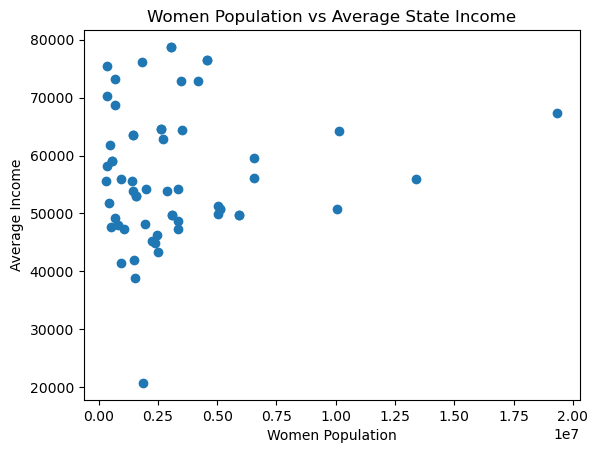

<Figure size 640x480 with 0 Axes>

In [9]:
plt.scatter(us_census.Women, us_census.Income)
plt.xlabel('Women Population')
plt.ylabel('Average Income')
plt.title('Women Population vs Average State Income')
plt.show()
plt.clf()

9. You want to double check your work. You know from experience that these monstrous csv files probably have `nan` values in them! Print out your column with the number of women per state to see.

   We can fill in those `nan`s by using pandas' `.fillna()` function.
   
   You have the `TotalPop` per state, and you have the `Men` per state. As an estimate for the `nan` values in the `Women` column, you could use the `TotalPop` of that state minus the `Men` for that state.
   
   Print out the `Women` column after filling the `nan` values to see if it worked!

In [ ]:
# I did this in step 7

10. We forgot to check for duplicates! Use `.duplicated()` on your `census` DataFrame to see if we have duplicate rows in there.

In [10]:
print(us_census.duplicated(subset = us_census.columns[1:]))

0    False
1    False
2    False
3    False
4    False
5    False
0     True
1    False
2    False
3    False
4    False
5    False
0     True
1    False
2    False
3    False
4    False
5    False
0     True
1    False
2    False
3    False
4    False
5    False
0     True
1    False
2    False
3    False
4    False
5    False
0     True
1    False
2    False
3    False
4    False
5    False
0     True
1    False
2    False
3    False
4    False
5    False
0     True
1    False
2    False
3    False
4    False
5    False
0     True
1    False
2    False
3    False
4    False
5    False
0     True
1    False
2    False
3    False
4    False
5    False
dtype: bool


11. Drop those duplicates using the `.drop_duplicates()` function.

In [11]:
us_census = us_census.drop_duplicates(subset = us_census.columns[1:])
print(us_census)

   Unnamed: 0                 State  TotalPop Hispanic   White   Black  \
0           0               Alabama   4830620    3.75%  61.88%  31.25%   
1           1                Alaska    733375    5.91%  60.91%   2.85%   
2           2               Arizona   6641928   29.57%  57.12%   3.85%   
3           3              Arkansas   2958208    6.22%  71.14%  18.97%   
4           4            California  38421464   37.29%  40.22%   5.68%   
5           5              Colorado   5278906   20.78%  69.90%   3.55%   
1           1           Connecticut   3593222   15.60%  67.68%  10.35%   
2           2              Delaware    926454    8.82%  64.63%  20.74%   
3           3  District of Columbia    647484    9.17%  33.10%  51.78%   
4           4               Florida  19645772   21.34%  59.08%  15.17%   
5           5               Georgia  10006693    8.42%  54.29%  32.09%   
1           1                Hawaii   1406299    9.19%  25.03%   2.05%   
2           2                 Idaho   

12. Make the scatterplot again. Now, it should be perfect! Your job is secure, for now.

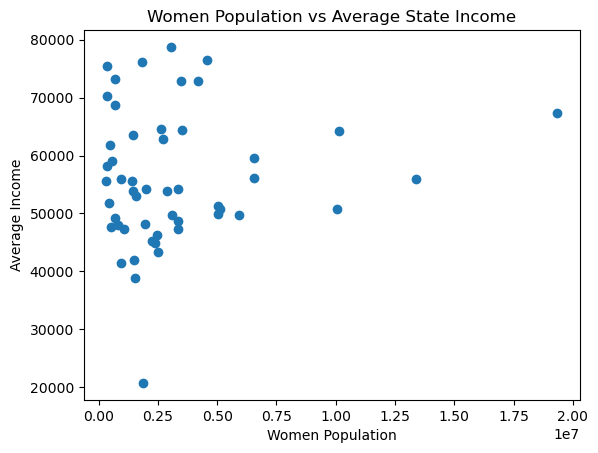

<Figure size 640x480 with 0 Axes>

In [12]:
plt.scatter(us_census.Women, us_census.Income)
plt.xlabel('Women Population')
plt.ylabel('Average Income')
plt.title('Women Population vs Average State Income')
plt.show()
plt.clf()

## Histogram of Races

13. Now your boss wants you to make a bunch of histograms out of the race data that you have. Look at the `.columns` again to see what the race categories are.

In [13]:
print(us_census.head())

   Unnamed: 0       State  TotalPop Hispanic   White   Black  Native   Asian  \
0           0     Alabama   4830620    3.75%  61.88%  31.25%   0.45%   1.05%   
1           1      Alaska    733375    5.91%  60.91%   2.85%  16.39%   5.45%   
2           2     Arizona   6641928   29.57%  57.12%   3.85%   4.36%   2.88%   
3           3    Arkansas   2958208    6.22%  71.14%  18.97%   0.52%   1.14%   
4           4  California  38421464   37.29%  40.22%   5.68%   0.41%  13.05%   

  Pacific    Income            GenderPop       Men     Women  
0   0.03%  43296.36    2341093M_2489527F   2341093   2489527  
1   1.06%  70354.74      384160M_349215F    384160    349215  
2   0.17%  54207.82    3299088M_3342840F   3299088   3342840  
3   0.15%  41935.63    1451913M_1506295F   1451913   1506295  
4   0.35%  67264.78  19087135M_19334329F  19087135  19334329  


14. Try to make a histogram for each one!

    You will have to get the columns into the numerical format, and those percentage signs will have to go.
    
    Don't forget to fill the `nan` values with something that makes sense! You probably dropped the duplicate rows when making your last graph, but it couldn't hurt to check for duplicates again.

C:\Users\servu\AppData\Local\Temp\ipykernel_14788\475375761.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '3.75' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  us_census[race].iat[i] = string
C:\Users\servu\AppData\Local\Temp\ipykernel_14788\475375761.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '61.88' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  us_census[race].iat[i] = string
C:\Users\servu\AppData\Local\Temp\ipykernel_14788\475375761.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '31.25' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  us_census[race].iat[i] = string
C:\Users\servu\AppData\Loc

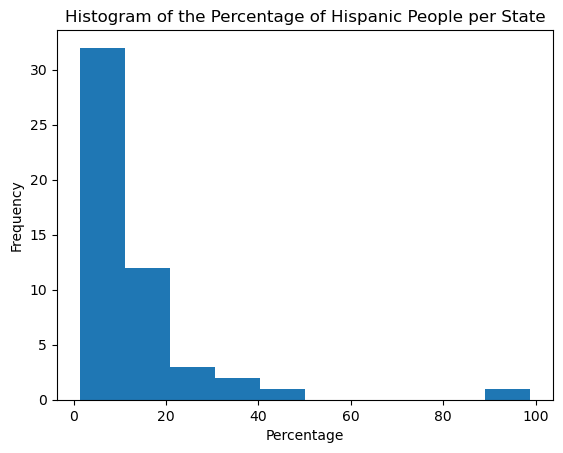

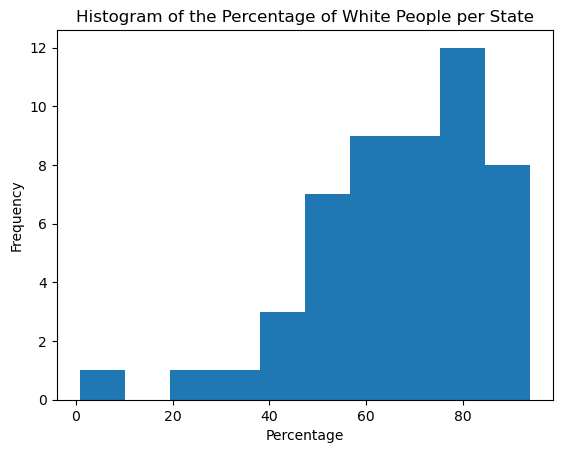

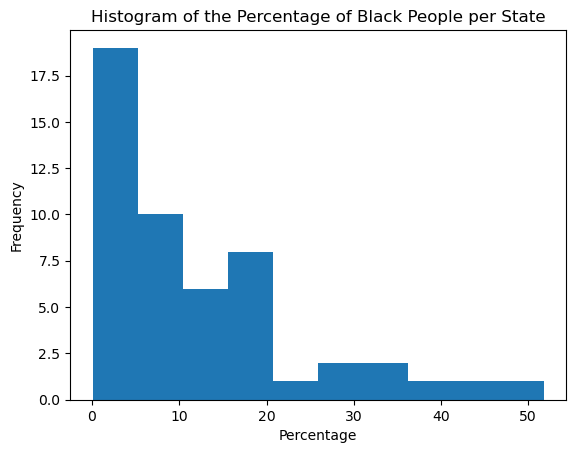

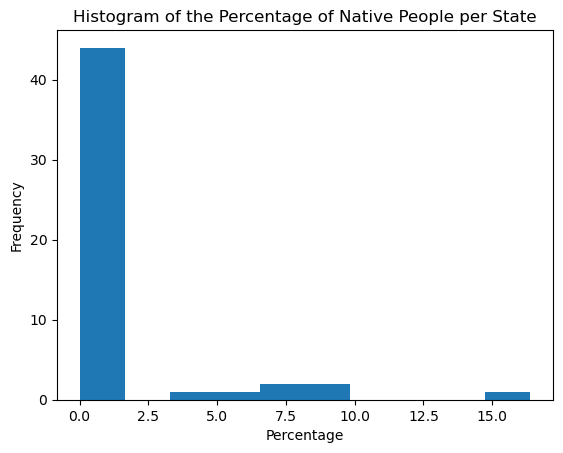

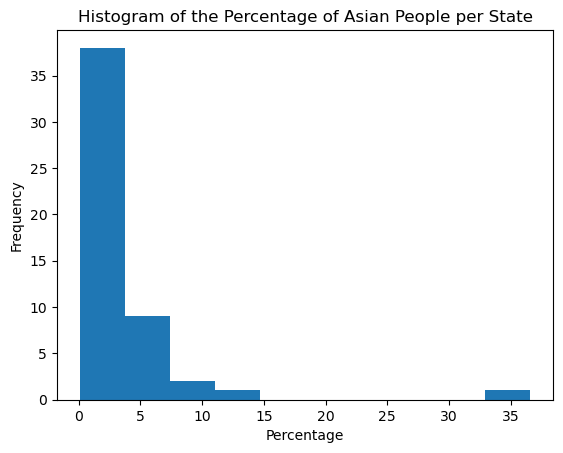

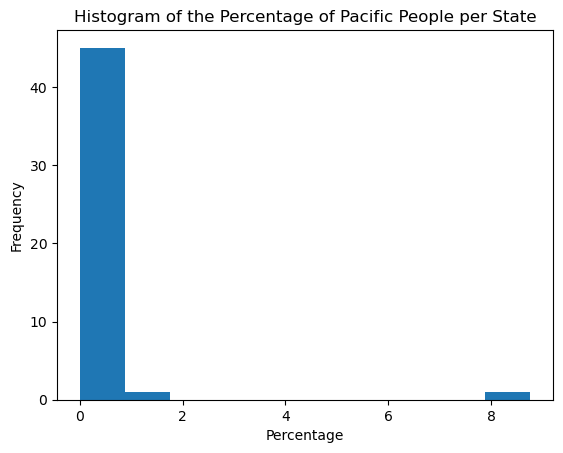

<Figure size 640x480 with 0 Axes>

In [15]:
for race in ['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific']:
    for i in range(0,len(us_census)):
        string = str(us_census[race].iat[i])
        string = string.replace('%','')
        if string == 'nan':
            string = ''
        us_census[race].iat[i] = string
    us_census[race] = pd.to_numeric(us_census[race])

us_census = us_census.drop_duplicates(subset = us_census.columns[1:])

for race in ['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific']:
    plt.hist(us_census[race])
    plt.title("Histogram of the Percentage of {} People per State".format(race))
    plt.xlabel("Percentage")
    plt.ylabel("Frequency")
    plt.show()
    plt.clf()


## Get Creative

15. Phew. You've definitely impressed your boss on your first day of work.

    But is there a way you really convey the power of pandas and Python over the drudgery of `csv` and Excel?
    
    Try to make some more interesting graphs to show your boss, and the world! You may need to clean the data even more to do it, or the cleaning you have already done may give you the ease of manipulation you've been searching for.